In [184]:
import os
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *


path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
dfHolidays=pd.read_csv(path+f"\\holidays.csv")
iOoS=28
data=pd.read_pickle(Y_path)



In [8]:
from statsmodels.tsa.seasonal import STL

### TEMPORAL

In [208]:
tree=Tree( data= data , type='spatial') 
tree.forecast_Prophet(iOoS=28)
tree.reconcile('ols')


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Reconciliation is complete


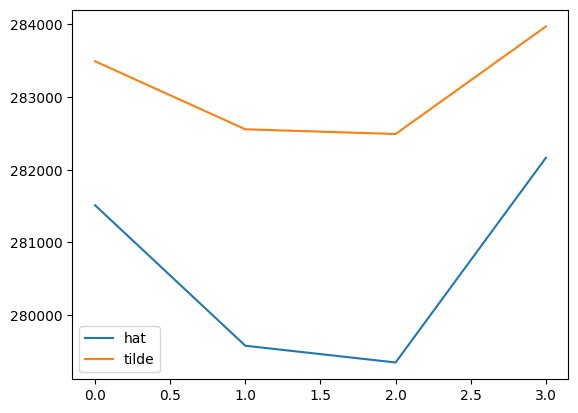

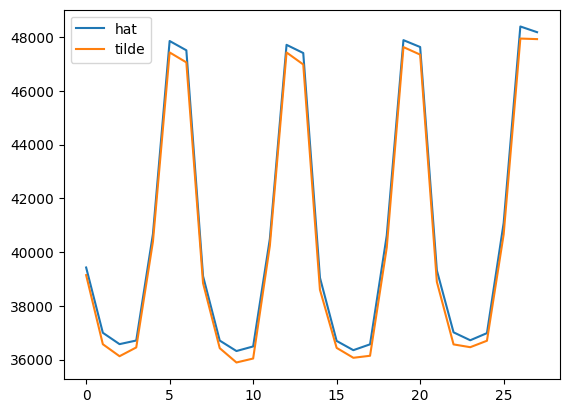

In [207]:
plt.plot(treeSr.mYhat[0,:],label='hat')
plt.plot(treeSr.mYtilde[0,:],label='tilde')
plt.legend()
plt.show()
plt.plot(treeSr.mYhat[1:,:].flatten(),label='hat')
plt.plot(treeSr.mYtilde[1:,:].flatten(),label='tilde')
plt.legend()
plt.show()

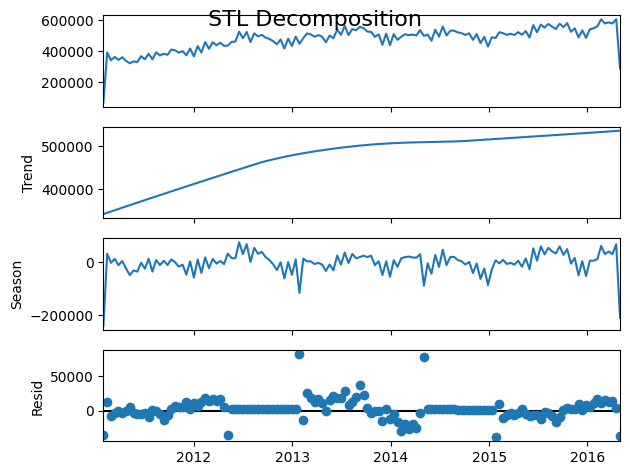

In [23]:
stl = STL(sr, seasonal=23)
result = stl.fit()

# Plot STL decomposition
result.plot()
plt.suptitle("STL Decomposition", fontsize=16)
plt.show()